In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz
import graphviz

In [11]:
df = pd.read_csv("diabetes.csv")
df.describe()

,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [12]:
df['class'] = df['class'].map({'tested_positive': 1, 'tested_negative': 0})
X = df.values[:, :-1]
y = df.values[:, -1]

X_test, X_train, y_test, y_train = train_test_split(X, y, train_size=0.7, random_state=50)

The error in the test data increases while the error in the training data decreases - we are dealing with overfitting.

The error in the test data decreases, while the error in the training data increases - we are dealing with undertraining.

17/17 [==============================] - 0s 2ms/step
Accuracy:  0.6554934823091247
Confusion matrix: 
 [[352   0]
 [185   0]]


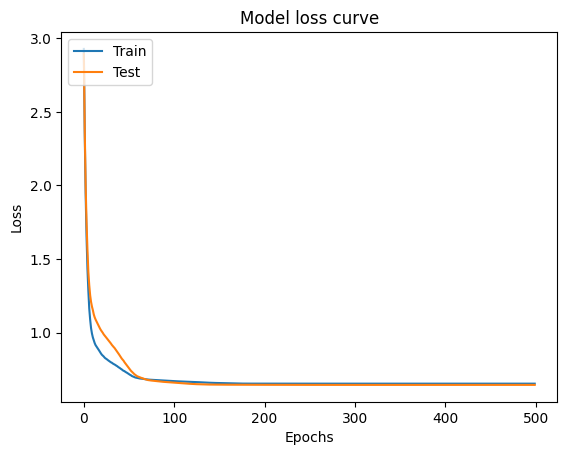

In [13]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))
    
y_pred = model.predict(X_test).round()

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
    
ann_viz(model, title=f"Model visualization")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Good fit with small error in the beggining

17/17 [==============================] - 0s 3ms/step
Accuracy:  0.6554934823091247
Confusion matrix: 
 [[352   0]
 [185   0]]


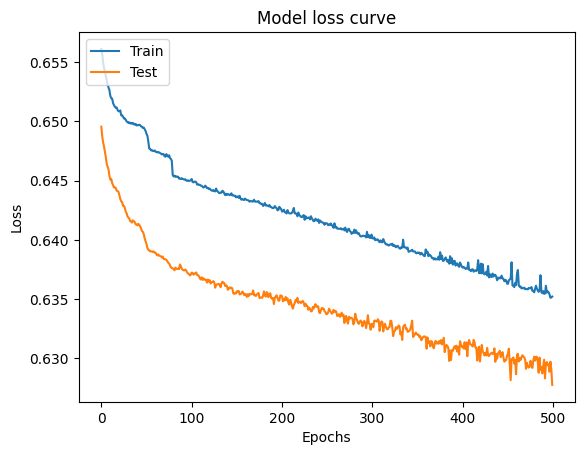

17/17 [==============================] - 0s 2ms/step
Accuracy:  0.6499068901303539
Confusion matrix: 
 [[343   9]
 [179   6]]


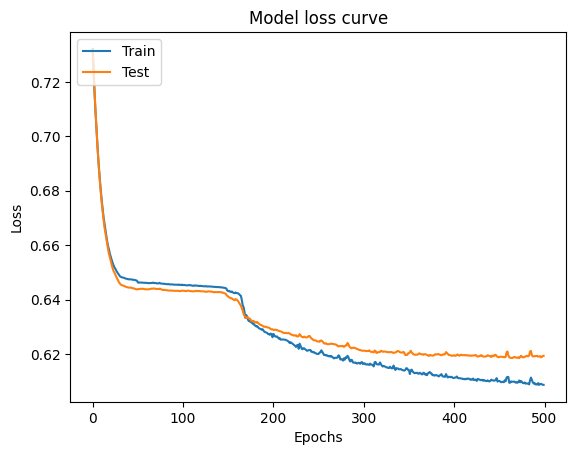

17/17 [==============================] - 0s 2ms/step
Accuracy:  0.6741154562383612
Confusion matrix: 
 [[319  33]
 [142  43]]


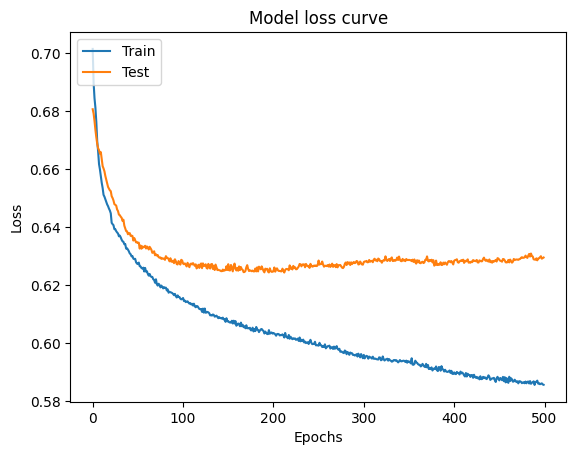

In [14]:
options = [['sgd', 'sigmoid'], ['adam', 'sigmoid'], ['rmsprop', 'tanh']]
for option in options:
    model = Sequential()
    model.add(Dense(6, activation=option[1], input_dim=X_train.shape[1]))
    model.add(Dense(3, activation=option[1]))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=option[0], loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))
    
    y_pred = model.predict(X_test).round()

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

1 - Underfit
2 - Overfit
3 - Overfit